# Movie Recommendation System

### Team Members:
#### 1. Lava kumar Koyi - lavakoyi@iu.edu
#### 2. Sai Durga Aniesh Baratam - sbaratam@iu.edu
#### 3. Nehul Rangappa - nrangapp@iu.edu
#### 4. Nikhil Sai Dandamudi - nidandam@iu.edu

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from datetime import datetime
import copy

## Movies Data Preprocessing

In [2]:
movies_df = pd.read_csv("./Datasets/movie_lens_small/movies.csv")

In [3]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


# New Section

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies_df.shape[0]

9742

In [7]:
movies_df.isnull().sum().sort_values()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
unknown_valued_columns=[]
for c in movies_df.columns:
    print("Number of unknown values for the attribute",c,"=",movies_df.loc[movies_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute title = 0
Number of unknown values for the attribute genres = 0


In [9]:
def split_genre(x):
    return x.split('|')

In [10]:
movies_df['genres'] = movies_df['genres'].apply(split_genre)

In [11]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [12]:
movies_df=movies_df.explode('genres')

In [13]:
movies_df.rename(columns={"genres": "genre"}, inplace=True)

In [14]:

movies_df.head()

,movieId,title,genre
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [15]:
def extract_year_of_release(x):
    year=x.split('(')
    if len(year)!=2:
        return ""
    
    return year[1][:-1]

In [16]:
movies_df['year_of_release'] = movies_df['title'].apply(extract_year_of_release)

In [17]:
movies_df.tail(10)

,movieId,title,genre,year_of_release
9737,193581,Black Butler: Book of the Atlantic (2017),Animation,2017
9737,193581,Black Butler: Book of the Atlantic (2017),Comedy,2017
9737,193581,Black Butler: Book of the Atlantic (2017),Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation,2017
9738,193583,No Game No Life: Zero (2017),Comedy,2017
9738,193583,No Game No Life: Zero (2017),Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


In [18]:
def extract_title(t):
    return t.split(" (")[0]

In [19]:
movies_df['title'] = movies_df['title'].apply(extract_title)

In [20]:
movies_df.tail()

,movieId,title,genre,year_of_release
9738,193583,No Game No Life: Zero,Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple,Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules,Comedy,1991


## Ratings Data Preprocessing

In [21]:
ratings_df = pd.read_csv("./Datasets/movie_lens_small/ratings.csv")

In [22]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [23]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [25]:
ratings_df.shape[0]

100836

In [26]:
ratings_df.isnull().sum().sort_values()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [27]:
unknown_valued_columns=[]
for c in ratings_df.columns:
    print("Number of unknown values for the attribute",c,"=",ratings_df.loc[ratings_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute userId = 0
Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute rating = 0
Number of unknown values for the attribute timestamp = 0


In [28]:
ratings_df['date']=ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime( "%d-%m-%Y"))

In [29]:
ratings_df.tail()

,userId,movieId,rating,timestamp,date
100831,610,166534,4.0,1493848402,03-05-2017
100832,610,168248,5.0,1493850091,03-05-2017
100833,610,168250,5.0,1494273047,08-05-2017
100834,610,168252,5.0,1493846352,03-05-2017
100835,610,170875,3.0,1493846415,03-05-2017


## Tags Data Preprocessing

In [30]:
tags_df = pd.read_csv("./Datasets/movie_lens_small/tags.csv")

In [31]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [32]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [33]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [34]:
tags_df.shape[0]

3683

In [35]:
tags_df.isnull().sum().sort_values()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [36]:
unknown_valued_columns=[]
for c in tags_df.columns:
    print("Number of unknown values for the attribute",c,"=",tags_df.loc[tags_df[c] == '?'].shape[0])
    unknown_valued_columns.append(c)

Number of unknown values for the attribute userId = 0
Number of unknown values for the attribute movieId = 0
Number of unknown values for the attribute tag = 0
Number of unknown values for the attribute timestamp = 0


In [37]:
tags_df['date']=tags_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x).strftime( "%d-%m-%Y"))

In [38]:
tags_df.tail()

,userId,movieId,tag,timestamp,date
3678,606,7382,for katie,1171234019,11-02-2007
3679,606,7936,austere,1173392334,08-03-2007
3680,610,3265,gun fu,1493843984,03-05-2017
3681,610,3265,heroic bloodshed,1493843978,03-05-2017
3682,610,168248,Heroic Bloodshed,1493844270,03-05-2017


## Integrated Data Preprocessing

In [39]:
ratings_df1=copy.deepcopy(ratings_df)

ratings_df1.drop(columns=['timestamp'],inplace=True)

ratings_df1.rename(columns={"date": "rated_on"}, inplace=True)

In [40]:
df=movies_df.merge(ratings_df1,how='inner',on='movieId')

In [41]:
df.head()

,movieId,title,genre,year_of_release,userId,rating,rated_on
0,1,Toy Story,Adventure,1995,1,4.0,30-07-2000
1,1,Toy Story,Adventure,1995,5,4.0,08-11-1996
2,1,Toy Story,Adventure,1995,7,4.5,25-01-2005
3,1,Toy Story,Adventure,1995,15,2.5,13-11-2017
4,1,Toy Story,Adventure,1995,17,4.5,18-05-2011


In [42]:
df.shape[0]

274480

In [43]:
df.drop(df.loc[df["year_of_release"]==""].index, inplace=True)

## Movies Data Set EDA

In [44]:
movies_df.head()

,movieId,title,genre,year_of_release
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995


In [45]:
movies_df["genre"].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [46]:
average_movie_rating=df.groupby('title', as_index=False)['rating'].mean().sort_values('rating',ascending=False)

In [47]:
average_movie_rating.head()

,title,rating
731,Battle For Sevastopol,5.0
2957,Girls About Town,5.0
3205,Harlan County U.S.A.,5.0
3185,Happy Feet Two,5.0
8220,"Woman Under the Influence, A",5.0


In [48]:
genre_rating=df.groupby('genre', as_index=False)['rating'].mean().sort_values('rating',ascending=False)

In [49]:
genre_rating.head()

,genre,rating
10,Film-Noir,3.906100
7,Documentary,3.809228
18,War,3.794569
6,Crime,3.649886
8,Drama,3.638688


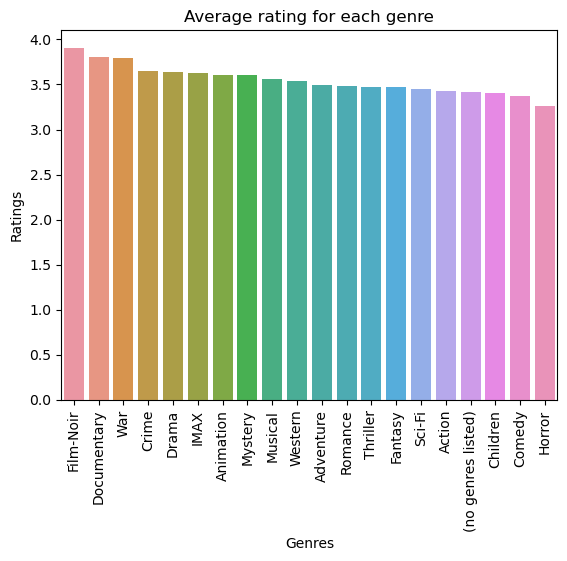

In [50]:
sns.barplot(x=genre_rating["genre"],y=genre_rating["rating"])
plt.title('Average rating for each genre')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Ratings')
plt.show()

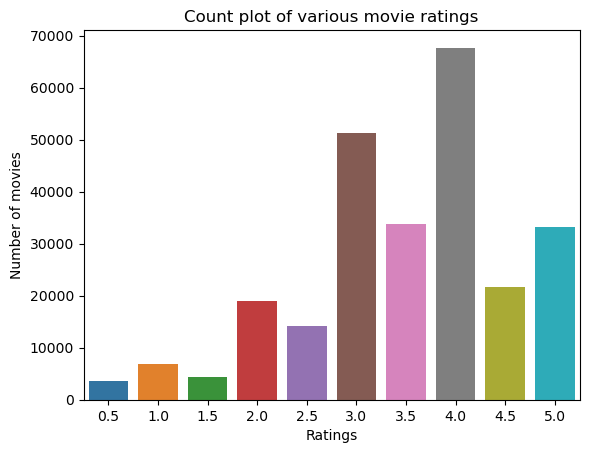

In [51]:
sns.countplot(x=df['rating'])
plt.title('Count plot of various movie ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of movies')
plt.show()

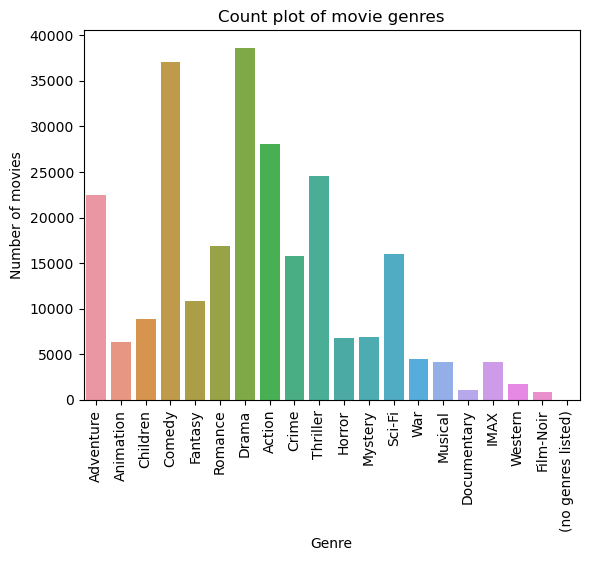

In [52]:
sns.countplot(data=df,x='genre')
plt.title('Count plot of movie genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.show()

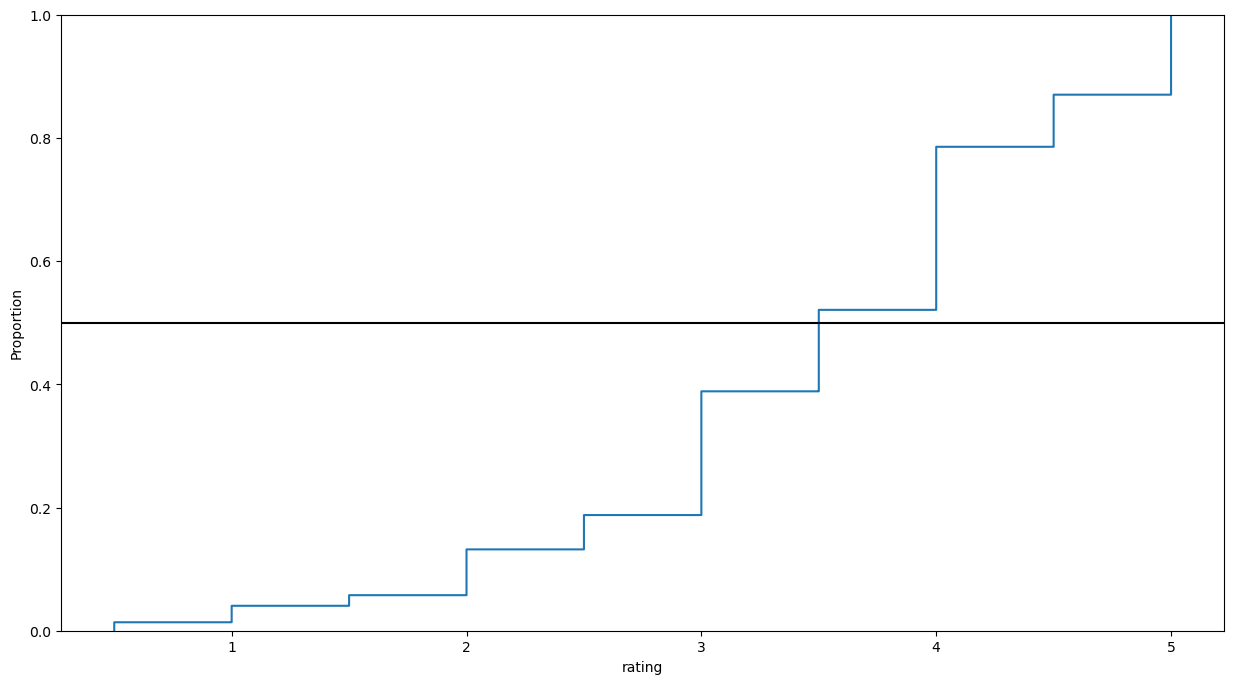

In [53]:
plt.figure(figsize=(15,8))
sns.ecdfplot(x=df['rating'])
plt.axhline(0.5,c="black")

<AxesSubplot:>

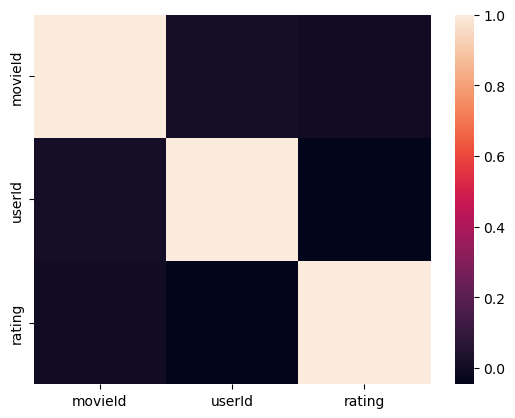

In [54]:
sns.heatmap(df.corr())

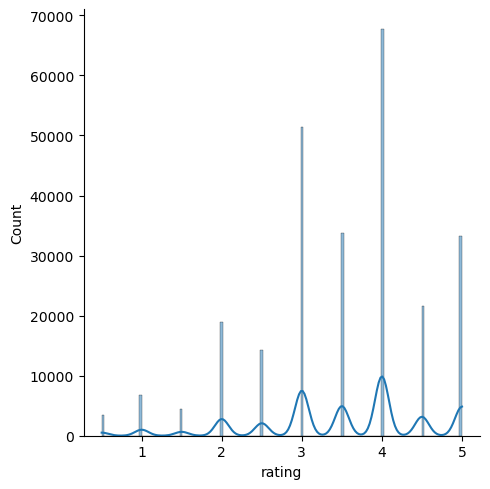

In [55]:
sns.displot(x=df["rating"],kde=True)
plt.show()

In [56]:
df["year_of_release"].value_counts()


1995         14881
1994         13469
1999         11528
1996         11449
2001          9521
             ...  
1919             2
1915             2
1917             1
1920             1
2006–2007        1
Name: year_of_release, Length: 113, dtype: int64

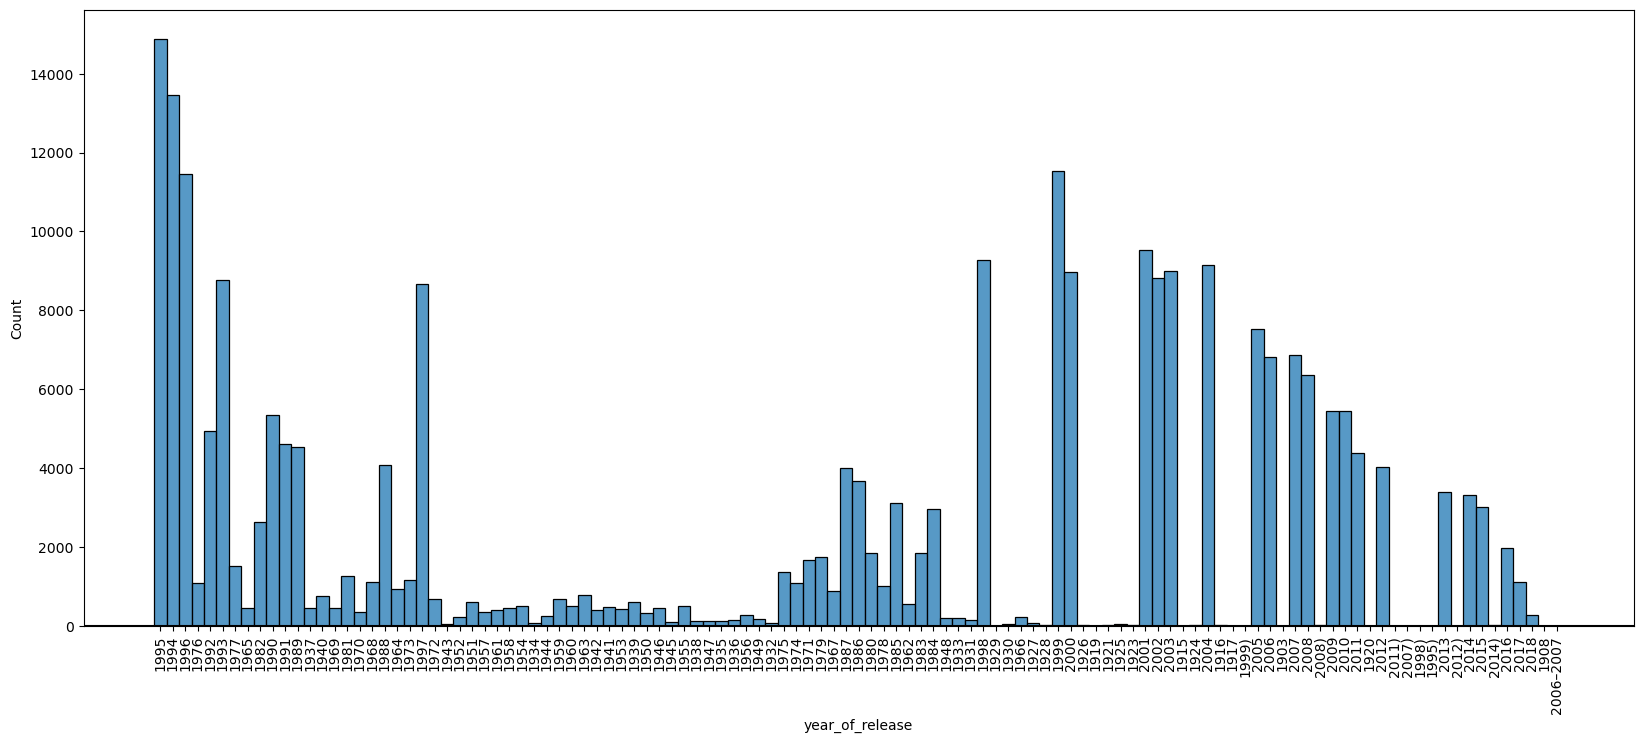

In [57]:
plt.figure(figsize=(20,8))
sns.histplot(x=df["year_of_release"])
plt.xticks(rotation=90)
plt.axhline(0.5,c="black")

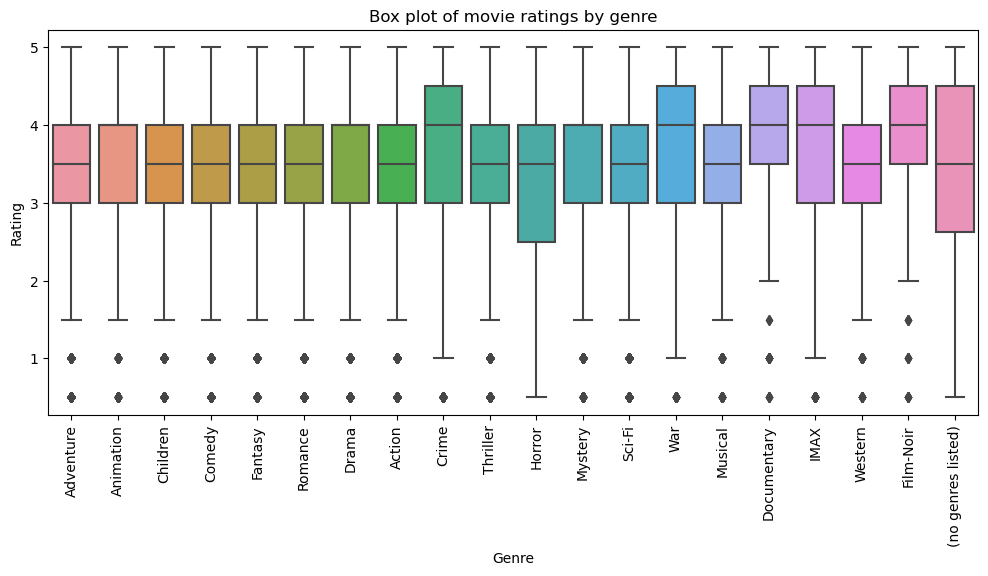

In [58]:
plt.figure(figsize=(12,5))
sns.boxplot(x='genre', y='rating', data=df)
plt.title('Box plot of movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

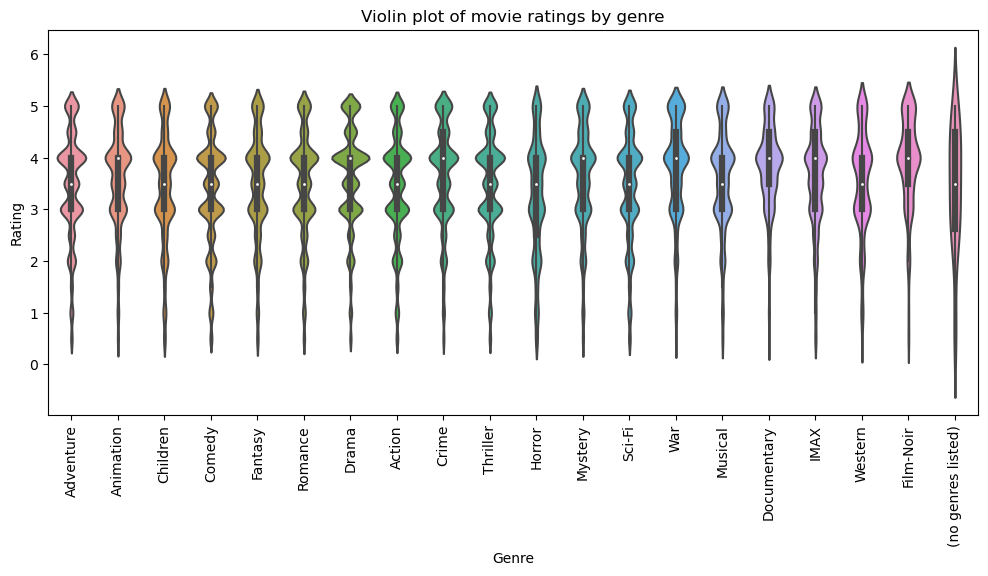

In [59]:
plt.figure(figsize=(12,5))
sns.violinplot(x='genre', y='rating', data=df)
plt.title('Violin plot of movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [60]:
### group by 10 years of movies

int(df['year_of_release'].min()) % 10

3

In [61]:

    
df['year_of_release'] = df['year_of_release'].str.strip(')')

# df['year_of_release'] = df['year_of_release'].apply(extract_year).astype(int)

def convert_to_int(year_str):
        return int(year_str[0:4])

df['year_of_release'] = df['year_of_release'].apply(convert_to_int)

In [62]:
def decade(df):
    min = int(df['year_of_release'].min()) % 10
    max = int(df['year_of_release'].max()) % 10
    
    min = int(df['year_of_release'].min()) - min
    max = int(df['year_of_release'].max()) + (10 - max)
    df['year_of_release'].astype(int)
    for year in range(min, max+1 , 10):
        print(year)
#         df['year_of_release'].replace((df['year_of_release'] >= year) & (df['year_of_release'] < (year+10)))
#         df['year_of_release'] = np.where((df['year_of_release'] >= year) & (df['year_of_release'] <= (year+10)), min, df['year_of_release'])
        df.loc[(df['year_of_release'] >= year) & (df['year_of_release'] <= (year+10)), 'decade_of_release'] = int(year)
    
    return df
    
df1 = decade(df)

df1['decade_of_release'] = df1['decade_of_release'].astype(int)

1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020


In [63]:
df1

,movieId,title,genre,year_of_release,userId,rating,rated_on,decade_of_release
0,1,Toy Story,Adventure,1995,1,4.0,30-07-2000,1990
1,1,Toy Story,Adventure,1995,5,4.0,08-11-1996,1990
2,1,Toy Story,Adventure,1995,7,4.5,25-01-2005,1990
3,1,Toy Story,Adventure,1995,15,2.5,13-11-2017,1990
4,1,Toy Story,Adventure,1995,17,4.5,18-05-2011,1990
...,...,...,...,...,...,...,...,...
274475,193583,No Game No Life: Zero,Fantasy,2017,184,3.5,16-09-2018,2010
274476,193585,Flint,Drama,2017,184,3.5,16-09-2018,2010
274477,193587,Bungo Stray Dogs: Dead Apple,Action,2018,184,3.5,16-09-2018,2010
274478,193587,Bungo Stray Dogs: Dead Apple,Animation,2018,184,3.5,16-09-2018,2010


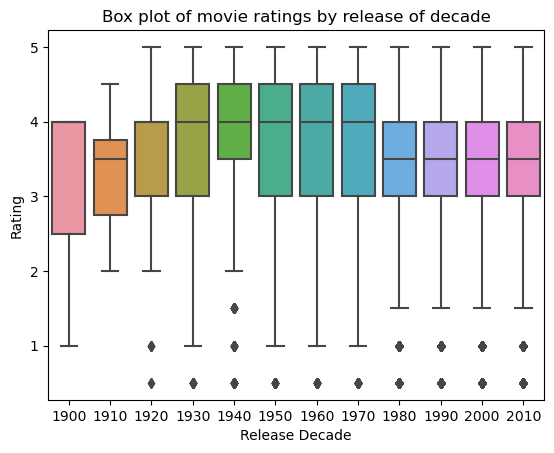

In [64]:
sns.boxplot(x='decade_of_release', y='rating', data=df)
plt.title('Box plot of movie ratings by release of decade')
plt.xlabel('Release Decade')
plt.ylabel('Rating')
plt.show()

In [65]:
!pip install scikit-surprise


In [66]:
movies_df_fin = pd.read_csv("./Datasets/movie_lens_small/movies.csv")

# correlation 
# rating vs genre box plot,violin plot
# 

In [67]:
######## spliting the data between train and test
from sklearn.model_selection import train_test_split
movie_rating = ratings_df.merge(movies_df_fin, on='movieId', how='left')

# Split into train and test sets
train_df, test_df = train_test_split(movie_rating, test_size=0.2, random_state=42)



In [68]:
movies_df_fin.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
print(ratings_df.head())

   userId  movieId  rating  timestamp        date
0       1        1     4.0  964982703  30-07-2000
1       1        3     4.0  964981247  30-07-2000
2       1        6     4.0  964982224  30-07-2000
3       1       47     5.0  964983815  30-07-2000
4       1       50     5.0  964982931  30-07-2000


# Training the data with KNNBasic

In [70]:
from surprise import Dataset, Reader, KNNBasic

# create a reader object
reader = Reader(rating_scale=(0.5, 5.0))

# create a Dataset object from the dataframe
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# define the KNNBasic model and fit it to the data
model = KNNBasic()
model.fit(data.build_full_trainset())


Computing the msd similarity matrix...
Done computing similarity matrix.


# Training the data with SVD

In [71]:
from surprise import Dataset, Reader, KNNBasic,SVD

# create a reader object
reader = Reader(rating_scale=(0.5, 5.0))

# create a Dataset object from the dataframe
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# define the KNNBasic model and fit it to the data
model1 = SVD()
model1.fit(data.build_full_trainset())


In [72]:
from surprise import Dataset, Reader, KNNBasic

# create a reader object
reader = Reader(rating_scale=(0.5, 5.0))

# create a Dataset object from the dataframe
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# define the KNNBasic model and fit it to the data
model = KNNBasic()
model.fit(data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [73]:
import surprise
print (surprise.__version__)

1.1.3


In [74]:
import pickle 
pkl_file = "model.pkl"
with open(pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [75]:
test_df.head()

,userId,movieId,rating,timestamp,date,title,genres
67037,432,77866,4.5,1335139641,22-04-2012,Robin Hood (2010),Action|Adventure|Drama|Romance|War
42175,288,474,3.0,978465565,02-01-2001,In the Line of Fire (1993),Action|Thriller
93850,599,4351,3.0,1498524542,26-06-2017,Point Break (1991),Action|Crime|Thriller
6187,42,2987,4.0,996262677,27-07-2001,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...
12229,75,1610,4.0,1158989841,23-09-2006,"Hunt for Red October, The (1990)",Action|Adventure|Thriller


In [76]:
pred = model.predict(428, 3624)

In [77]:
print(pred.iid,pred.est)

3624 3.129621933324203


In [78]:
def get_predictions(id_user):
    itemIds = test_df['movieId'].unique()

    # get the list of itemIds that user 1 has already rated
    rated_itemIds = test_df.loc[test_df['userId']==id_user, 'movieId'].values

    # get the list of itemIds that user 1 has not rated
    unrated_itemIds = list(set(itemIds) - set(rated_itemIds))

    # create a list of tuples with (userId, itemId) for unrated items
    testset = [(id_user, itemId) for itemId in unrated_itemIds]

    # make predictions for the testset
    predictions=[]
    for test in testset:
        pred=model1.predict(test[0],test[1])
        predictions.append([pred.iid,pred.est])
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    #predictions.sort(key=lambda x: x.est, reverse=True)
    # print the first 10 predictions
    
    return predictions

In [150]:
class recommendation:
    def __init__(self):
        self.reader = Reader(rating_scale=(0.5, 5.0))
        self.data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
        
        self.KNNModel = KNNBasic()
        self.SVDModel = SVD()
        
        self.mean_rmse = []
        self.mean_mae = []
        self.mean_mape = []
        
    def KNNBasline(self):
        self.KNNModel.fit(data.build_full_trainset())
    
    def SVD(self):
        self.SVDModel.fit(data.build_full_trainset())
        
    def get_predictions(self,id_user, model):
        itemIds = test_df['movieId'].unique()

        # get the list of itemIds that user 1 has already rated
        rated_itemIds = test_df.loc[test_df['userId']==id_user, 'movieId'].values

        # get the list of itemIds that user 1 has not rated
        unrated_itemIds = list(set(itemIds) - set(rated_itemIds))

        # create a list of tuples with (userId, itemId) for unrated items
        testset = [(id_user, itemId, rating) for (itemId, rating) in test_df.loc[test_df['userId'] == id_user, ['movieId', 'rating']].values]

        # make predictions for the testset
        predictions = []
        for test in testset:
            pred = model.predict(test[0], test[1])
            predictions.append([pred.iid, pred.est])

        predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

        return testset, predictions
    
    def metrics(self,model):
        rmse_list = []
        mae_list = []
        mape_list = []
        for user in test_df['userId'].unique():
            testset, predictions = recommendations.get_predictions(user,model)
            actual_ratings = [test[2] for test in testset]
            predicted_ratings = [pred[1] for pred in predictions]
            rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            mape_value = mape(actual_ratings, predicted_ratings)


            rmse_list.append(rmse)
            mae_list.append(mae)
            mape_list.append(mape_value)


        self.mean_rmse.append(np.mean(rmse_list))
        self.mean_mae.append(np.mean(mae_list))
        self.mean_mape.append(np.mean(mape_list))
        
    def final_metrics(self):
        metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])
        models = ['KNN','SVD']
        for i in range(len(self.mean_rmse)):
            metrics_df = metrics_df.append({'Model': models[i], 
                                            'RMSE': self.mean_rmse[i],
                                            'MAE': self.mean_mae[i],
                                            'MAPE': self.mean_mape[i]}, ignore_index=True)
            
        print(metrics_df)


In [151]:
recommendations = recommendation()
recommendations.KNNBasline()
recommendations.SVD()

recommendations.metrics(recommendations.KNNModel)
recommendations.metrics(recommendations.SVDModel)

recommendations.final_metrics()

# knn_predictions = recommendations.get_predictions(428,recommendations.KNNModel)
# svd_predictions = recommendations.get_predictions(428,recommendations.SVDModel)

Computing the msd similarity matrix...
Done computing similarity matrix.
  Model      RMSE       MAE       MAPE
0   KNN  1.087114  0.890944  40.192893
1   SVD  0.983134  0.802480  36.101480


C:\Users\lavakumarkoyi\AppData\Local\Temp\ipykernel_30864\216027848.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': models[i],
C:\Users\lavakumarkoyi\AppData\Local\Temp\ipykernel_30864\216027848.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': models[i],


In [135]:
def mape(actual, forecast):
    
    n = len(actual)
    error = 0

    for i in range(n):
        if actual[i] != 0:
            error += abs((actual[i] - forecast[i]) / actual[i])

    mape = (error / n) * 100

    return mape

In [79]:
genres_df = movies_df_fin['genres'].str.get_dummies('|')

# Rename columns
genres_df.columns = [col.lower() for col in genres_df.columns]

# Concatenate genres_df with original dataframe
movies_df_fin = pd.concat([movies_df_fin, genres_df], axis=1)

# Drop original genres column
movies_df_fin = movies_df_fin.drop('genres', axis=1)

In [80]:
movies_df_fin.drop(movies_df_fin[movies_df_fin['(no genres listed)'] == 1].index, inplace=True)

In [81]:
movies_df_fin.drop("(no genres listed)",inplace=True,axis=1)

In [82]:
movies_df_fin.to_csv('my_data.csv', index=False)

In [83]:
movies_df_fin.head()

,movieId,title,action,adventure,animation,children,comedy,crime,documentary,drama,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
predictions=get_predictions(428)
print(len(predictions))
n=len(predictions)//5
predictions=predictions[:n]
print(len(predictions))
matching_rows = [sublist[0] for sublist in predictions ]
result_df = movies_df_fin.loc[movies_df_fin['movieId'].isin(matching_rows)]

5083
1016


In [85]:
result_df.head()

,movieId,title,action,adventure,animation,children,comedy,crime,documentary,drama,...,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
5,6,Heat (1995),1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,11,"American President, The (1995)",0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
13,14,Nixon (1995),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [86]:
result_df.shape

(1016, 21)

In [87]:
list_geners=["adventure","action","thriller"]
cols=result_df.columns.tolist()
#print(cols)
cols.pop(0)
cols.pop(0)
#print(cols)
df_knn = pd.DataFrame(columns=cols)
dict_gen={}
for col in df_knn.columns:
    if col in list_geners:
        dict_gen[col]=1
    else:
        dict_gen[col]=0
df_knn = df_knn.append(dict_gen, ignore_index=True)
df_knn

C:\Users\lavakumarkoyi\AppData\Local\Temp\ipykernel_30864\1853005487.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_knn = df_knn.append(dict_gen, ignore_index=True)


,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,imax,musical,mystery,romance,sci-fi,thriller,war,western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [88]:
from sklearn.neighbors import NearestNeighbors

# Building the model
model_knn= NearestNeighbors(metric= 'cosine',n_neighbors=5, algorithm='brute')
#filtered_df = res_df[res_df['title'] == 'Toy Story (1995)']
sample_df=result_df.drop(['movieId','title'],axis=1)
#filtered_df=filtered_df.drop('title',axis=1)

# Fitting the model

model_knn.fit(sample_df)
distance,indexes= model_knn.kneighbors(df_knn)
print(result_df.iloc[indexes[0]]["title"])

2713    Man with the Golden Gun, The (1974)
2254                Live and Let Die (1973)
2972            Diamonds Are Forever (1971)
2218                      Goldfinger (1964)
1211       Hunt for Red October, The (1990)
Name: title, dtype: object


In [93]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Convert DataFrame to sparse ratings matrix
ratings_matrix = csr_matrix((ratings_df['rating'], (ratings_df['userId'] - 1, ratings_df['movieId'] - 1)))

# Perform Singular Value Decomposition (SVD)
k = 50  # Choose the number of latent factors
U, sigma, V = svds(ratings_matrix, k=k)

# Reconstruct the original ratings matrix
sigma_k = np.diag(sigma)
ratings_matrix_reconstructed = np.dot(np.dot(U, sigma_k), V)

# Make predictions for unknown ratings
user_id = 0  # Choose a user ID for whom to make recommendations
user_ratings = ratings_matrix.getrow(user_id).toarray().flatten()
user_ratings_reconstructed = ratings_matrix_reconstructed[user_id, :]

# Find the top N recommendations
N = 10
top_N_indices = np.argsort(user_ratings_reconstructed)[::-1][:N]
top_N_movie_ids = top_N_indices + 1  # Add 1 to convert back to 1-based indexing

# Print the top N movie recommendations
print("Top {} movie recommendations for user ID {}: ".format(N, user_id + 1))
for movie_id in top_N_movie_ids:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print("Movie ID {}: {}".format(movie_id, movie_title))


Top 10 movie recommendations for user ID 1: 
Movie ID 1196: Star Wars: Episode V - The Empire Strikes Back
Movie ID 260: Star Wars: Episode IV - A New Hope
Movie ID 1210: Star Wars: Episode VI - Return of the Jedi
Movie ID 1291: Indiana Jones and the Last Crusade
Movie ID 1198: Raiders of the Lost Ark
Movie ID 608: Fargo
Movie ID 2028: Saving Private Ryan
Movie ID 47: Seven
Movie ID 2115: Indiana Jones and the Temple of Doom
Movie ID 2858: American Beauty
